In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim        ### Es la libreria de optimizacion y de neural network (nn)
from torchvision import transforms, datasets ### sirve para editar las imagenes
import zipfile
import shutil
import os
import io
import pandas as pd

In [3]:
device=("cuda" if torch.cuda.is_available() else "CPU") ### usa GPU O CPU


In [4]:
class AlexNet(nn.Module):
  def __init__(self,num_classes:int=2):
    super(AlexNet,self).__init__()
    self.convolutional=nn.Sequential(
        nn.Conv2d(3,96,kernel_size=11,stride=4,padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(96,256,kernel_size=5,padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(256,384,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384,384,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384,256,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2)
        )
    self.avgpool=nn.AdaptiveAvgPool2d((6,6))
    self.linear=nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(256*6*6,4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096,4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096,2)
        )
  def forward(self,x0:torch.Tensor)->torch.Tensor:
    x1=self.convolutional(x0)
    x2=self.avgpool(x1)
    x3=torch.flatten(x2,1)
    x4=self.linear(x3)
    return torch.softmax(x4,1)
    
####Dropout se apaga la mitad aleatoriamente parairse aprendiendo de poco a poco mejorando el desempeño de la red 0.5==1/2
###    
##Sequential es la que va de capa en capa salida a entrada,padding reordemos que son 2 filas extras de 0,genera 96 capas
## a la salida con un movimiento de 4 pixeles 
### Conv2d es la primera capa convolucional de tipo relu 

In [5]:
modelo = AlexNet()
modelo = modelo.to(device)

In [6]:
from google.colab import files
uploader = files.upload()

Saving baseDatosDogCat.zip to baseDatosDogCat.zip


In [7]:
datos = zipfile.ZipFile(io.BytesIO(uploader['baseDatosDogCat.zip']),'r')
datos.extractall("perros_gatos/")

In [8]:
root = 'perros_gatos/data_base_dog_cat'
img_list = os.listdir(root)
print(len(img_list))

1000


In [9]:
basedatos = pd.read_csv('perros_gatos/lista_dog_cat.csv')
basedatos = basedatos[['Nombre','Categoria']]
print(basedatos)

               Nombre  Categoria
0      canino (1).jpg          1
1     canino (10).jpg          1
2    canino (100).jpg          1
3    canino (101).jpg          1
4    canino (102).jpg          1
..                ...        ...
995    perro (95).jpg          1
996    perro (96).jpg          1
997    perro (97).jpg          1
998    perro (98).jpg          1
999    perro (99).jpg          1

[1000 rows x 2 columns]


In [10]:
!rm -rf datos
!mkdir datos && mkdir datos/perros && mkdir datos/gatos

In [11]:
from numpy.lib.index_tricks import ndenumerate
# Separa imagenes 

s0 = 0
s1 = 0
num = 1000
for i, (_,i_row) in enumerate(basedatos.iterrows()):
  if s0<num:
    s0 += 1
    shutil.copyfile('perros_gatos/data_base_dog_cat/' + i_row['Nombre'], 'datos/perros/'+i_row['Nombre'])
  if s1<num:
    if i_row['Categoria'] == 0:
      shutil.copyfile('perros_gatos/data_base_dog_cat/' + i_row['Nombre'], 'datos/gatos/'+i_row['Nombre'])

  if s0 == num and s1 ==num: 
    break


In [14]:
img_list = os.listdir('datos/perros/')
img_list.extend(os.listdir('datos/gatos/'))
!rm -rf 'datos/.ipynb_checkpoints/'
transformar = transforms.Compose([transforms.ToTensor(), transforms.Resize((224,224)), transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
clases = datasets.ImageFolder('datos',transform = transformar)
entrenamiento, testeo = torch.utils.data.random_split(clases,[int(len(img_list)*0.8),len(img_list)-int(len(img_list)*0.8)])
cargarentrenamiento = torch.utils.data.DataLoader(entrenamiento,batch_size=32, shuffle= True)
cargarTesteo = torch.utils.data.DataLoader(testeo,batch_size=32, shuffle= True)



<function matplotlib.pyplot.show(close=None, block=None)>

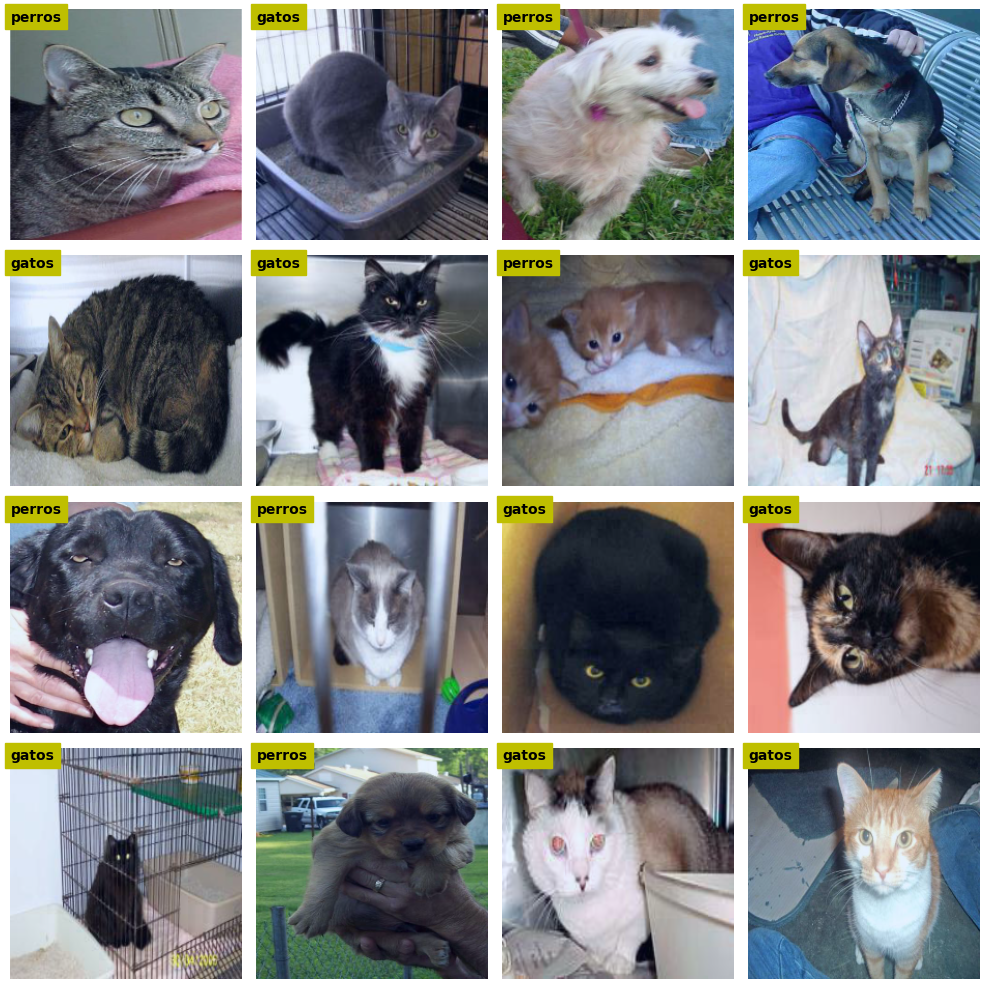

In [17]:
x,y = next(iter(cargarentrenamiento))
fig, axs = plt.subplots(4,4,figsize=(10,10))
for (i,ax) in enumerate(axs.flatten()):
  pic = x.data[i].numpy().transpose((1,2,0))
  pic = pic-np.min(pic)
  pic = pic/np.max(pic)
  label = clases.classes[y[i]]
  ax.imshow(pic)
  ax.text(0,0,label,ha='left',va='top',fontweight = 'bold',color = 'k', backgroundcolor = 'y')
  ax.axis('off')

plt.tight_layout()
plt.show

Epoca: 0 | error de entrenamiento: 0.6553669658146406
Epoca: 1 | error de entrenamiento: 0.6570117144208205
Epoca: 2 | error de entrenamiento: 0.6561893483525828
Epoca: 3 | error de entrenamiento: 0.6537222360309801
Epoca: 4 | error de entrenamiento: 0.6570117175579071
Epoca: 5 | error de entrenamiento: 0.6570117175579071
Epoca: 6 | error de entrenamiento: 0.6553669815000734
Epoca: 7 | error de entrenamiento: 0.6586564449887526
Epoca: 8 | error de entrenamiento: 0.6553669720888138
Epoca: 9 | error de entrenamiento: 0.6528998440817783
Epoca: 10 | error de entrenamiento: 0.6553669791472586
Epoca: 11 | error de entrenamiento: 0.6570117120680056
Epoca: 12 | error de entrenamiento: 0.6553669697359988
Epoca: 13 | error de entrenamiento: 0.6570117269691668
Epoca: 14 | error de entrenamiento: 0.6528998480031365
Epoca: 15 | error de entrenamiento: 0.6553669697359988
Epoca: 16 | error de entrenamiento: 0.6561893271772485
Epoca: 17 | error de entrenamiento: 0.6553669799315301
Epoca: 18 | error de

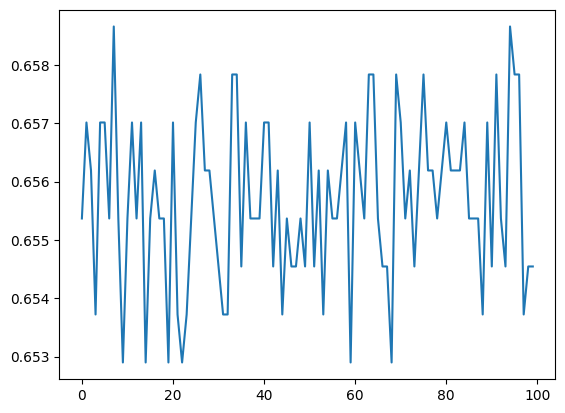

In [20]:
optimizador = optim.Adam(modelo.parameters(),lr=0.0001)
criterio = nn.CrossEntropyLoss()
epocas = 100
errorT = []
for epoca in range(epocas):
  errorTotal = 0
  for idx, (image,label) in enumerate(cargarentrenamiento):
    image,label = image.to(device), label.to(device)
    optimizador.zero_grad()
    prediccion = modelo(image)
    error = criterio(prediccion,label) 
    errorTotal += error.item()
    error.backward()
    optimizador.step()
  errorTotal = errorTotal/(idx+1)
  errorT.append(errorTotal)
  print(f'Epoca: {epoca} | error de entrenamiento: {errorTotal}' )
  for idx, (image,label) in enumerate(cargarTesteo):
    image,label = image.to(device), label.to(device)
    with torch.no_grad():
      salida = modelo(image)
      errortesteo = criterio(salida,label)


plt.plot(errorT)
